In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [19]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import os

In [40]:
os.getcwd()

'c:\\Users\\tammy\\OneDrive\\Documents\\GitHub\\sqlalchemy-challenge\\SurfsUp'

In [21]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [22]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [23]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [24]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:
#Find the most recent date in the data set.
data = session.query(Measurement).order_by(Measurement.date.desc()).first()
latest_date = data.__dict__['date']
latest_date

'2017-08-23'

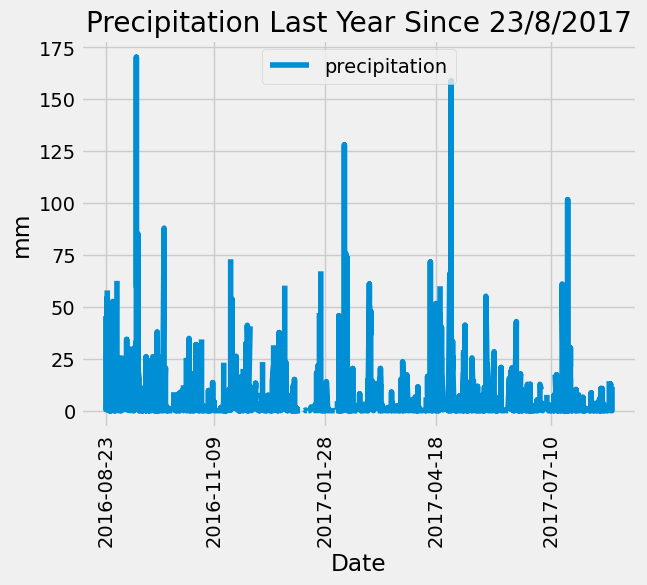

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
latest_datetime = dt.datetime.fromisoformat(latest_date)

# Calculate the date one year from the last date in data set.
one_year_ago = latest_datetime - dt.timedelta(days=365)
one_year_ago = one_year_ago.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])


# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(precipitation_df['date'], precipitation_df['precipitation'])
plt.title("Precipitation Last Year Since 23/8/2017")
plt.ylabel('mm')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.xticks(['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10'])
plt.legend(['precipitation'], loc='upper center')
plt.show()

In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number of stations in the dataset
total_number_of_stations = session.query(Station.station).distinct().count()
total_number_of_stations

9

In [30]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

station_prcp = session.query(Station.station, func.count(Measurement.station)).\
filter(Station.station==Measurement.station).group_by(Station.station).all()
station_prcp

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [31]:
# List the stations and their counts in descending order.
station_prcp.sort(key=lambda x: x[1], reverse=True)

# Print the results in a formatted way
print("Station Name\tMeasurement Count")
print("------------------------------")
for station, count in station_prcp:
    print(f"{station}\t\t{count}")

Station Name	Measurement Count
------------------------------
USC00519281		2772
USC00519397		2724
USC00513117		2709
USC00519523		2669
USC00516128		2612
USC00514830		2202
USC00511918		1979
USC00517948		1372
USC00518838		511


In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = 'USC00519281'

active_station_data = session.query(Measurement).filter(Measurement.station == station_id).all()

temperatures = [measurement.tobs for measurement in active_station_data]
lowest_temp = min(temperatures)
highest_temp = max(temperatures)
average_temp = sum(temperatures) / len(temperatures)


print(f"Most Active Station ID: {station_id}")
print(f"Lowest Temperature: {lowest_temp}")
print(f"Highest Temperature: {highest_temp}")
print(f"Average Temperature: {average_temp:.2f}") 

Most Active Station ID: USC00519281
Lowest Temperature: 12.2
Highest Temperature: 29.4
Average Temperature: 22.04


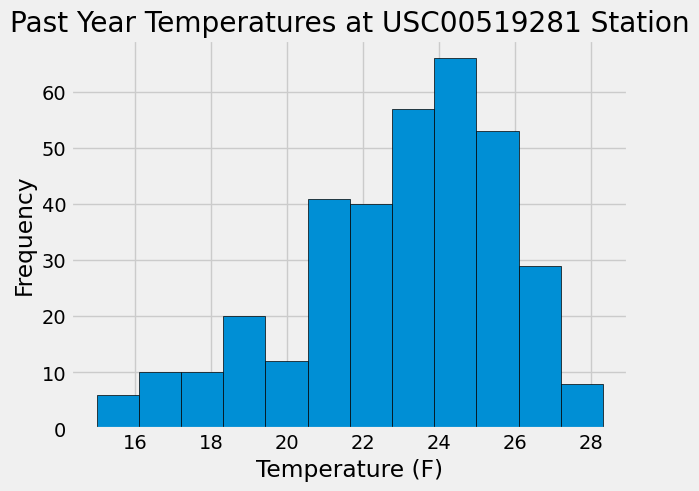

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_temp = session.query(Measurement.date, Measurement.tobs) \
    .filter(Measurement.station == station_id) \
    .filter(Measurement.date >= one_year_ago) \
    .filter(Measurement.date <= latest_date) \
    .all()

act_station_temp_df = pd.DataFrame(active_station_temp, columns=['date', 'temperature'])

act_station_temp_df = act_station_temp_df[act_station_temp_df['date'] >= one_year_ago]


# Create histogram
plt.hist(act_station_temp_df['temperature'], bins=12, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Past Year Temperatures at USC00519281 Station')
plt.grid(True)
plt.show()

# Close Session

In [35]:
# Close Session
session.close()
